<a id="top"></a>
# Countries of the World
---

In this analysis, we will explore a dataset consisting of 227 countries which includes data such as GDP per capita as well as 19 other features. We will aim to identify any interesting correlations, patterns and trends within the data and then attempt to build a model that will be able to predict GDP per capita based upon the other features.

## Contents
---

**1.  [Summary of Findings](#summary_of_findings)** <br>
**2.  [Statistical Summary of Models](#statistical_summary)** <br>
**3.  [About the Data](#about_the_data)** <br>
**4.  [Data Reading & Checking](#data_checking)** <br>
**5.  [Data Cleaning](#data_cleaning)** <br>
**6.  [EDA](#eda)** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**6.1.  [Region](#eda_region)** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**6.2.  [Climate](#eda_climate)** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**6.3.  [Sectors](#eda_sectors)** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**6.4.  [GDP per Capita](#eda_gdp)** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**6.5.  [EDA Summary of Findings](#eda_summary)** <br>
**7.  [Model Building](#model_building)** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**7.1.  [Linear Regression](#linear_regression)** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**7.2.  [Ridge Regression (L2)](#ridge_regression)** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**7.3.  [Lasso Regression (L1)](#lasso_regression)** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**7.4.  [SVR](#svr)** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**7.5.  [Random Forest](#random_forest)** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**7.6.  [Gradient Boosting](#gradient_boosting)** <br>
**8.  [Conclusion](#conclusion)** <br>
**9.  [Model Deployment](#model_deployment)** <br>
**10.  [Future Recommendations](#future_recommendations)** <br>

<a id="summary_of_findings"></a>
## 1. Summary of Findings
---

* **phones_per_1000** appeared to have a strong positive correlation with **gdp_per_capita_usd**.


* **agriculture** appeared to be negatively correlated with **gdp_per_capita_usd**.


* The **agriculture** sector made up the smallest proportion **(10% or less)** of most countries' economies, whereas the **service** sector made up a much larger proportion **(40–80%)**.


* **Luxembourg** had a considerably **higher GDP per Capita** than all other countries, even amongst other countries within the top 10 highest GDP per capita.

<a id="statistical_summary"></a>
## 2. Statistical Summary of Models
---

With GDP per capita ranging between $500 and $55,100, the best model for predicting GDP per capita was the Gradient Boosting model with an RMSE of $2389.22. The Random Forest model scored similarly with an RMSE of $2413.10. The worst model was the Support Vector Regressor with an RMSE of $4030.28.

| Models | Best MAE | Best RMSE | Best R² | Data Split Used |
| :- | :-: | :-: | :-: | :- |
| Linear Regression | 2317.30 | 3129.05 | 0.88 | Selected Features, Log Transformed |
| Ridge Regression (L2) | 2557.40 | 3187.32 | 0.88 | All Features, with Scaling |
| Lasso Regression (L1) | 2692.61 | 3490.58 | 0.85 | All Features, with Scaling |
| Support Vector Regression | 2880.74 | 4030.28 | 0.80 | Selected Features, Log Transformed |
| Random Forest | 1708.67 | 2413.10 | 0.93 | All Features, No Scaling |
| **Gradient Boosting** | **1561.26** | **2389.22** | **0.93** | **Selected Features, No Scaling** |

<a id="about_the_data"></a>
## 3. About the Data
---

The dataset used in this analysis was taken from Kaggle courtesy of Fernando Lasso. However, the data is sourced originally from the CIA World Factbook which provides information on the history, people and society, government, economy, energy, geography, communications, transportation, military, and transnational issues for world entities.

For the dataset used in this analysis, visit: https://www.kaggle.com/fernandol/countries-of-the-world

For more information on the CIA World Factbook, visit: https://www.cia.gov/library/publications/the-world-factbook/

<a id="data_checking"></a>
## 4. Data Reading & Checking

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read in data
data = pd.read_csv('data/countries_of_the_world.csv', decimal=',')

In [3]:
# Check data
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [4]:
# Check shape
print(f'Rows: {data.shape[0]}  |  Columns: {data.shape[1]}')

Rows: 227  |  Columns: 20


In [5]:
# See all column names
data.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [6]:
# Check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [7]:
# Strip any whitespace from values in country or region
data['Region'] = data['Region'].str.strip()
data['Country'] = data['Country'].str.strip()

Before we move forward with the analysis, let's verify some of the data. We'll look at the data for some countries to see if there are any discrepancies.

In [8]:
# Check veracity of data
data.loc[data['Country'].isin(['United Kingdom', 'United States', 'Germany', 'India', 'China'])]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.40,24.18,5000.0,90.9,266.7,15.40,1.25,83.35,1.5,13.25,6.97,0.125,0.473,0.403
76,Germany,WESTERN EUROPE,82422299,357021,230.9,0.67,2.18,4.16,27600.0,99.0,667.9,33.85,0.59,65.56,3.0,8.25,10.62,0.009,0.296,0.695
94,India,ASIA (EX. NEAR EAST),1095351995,3287590,333.2,0.21,-0.07,56.29,2900.0,59.5,45.4,54.40,2.74,42.86,2.5,22.01,8.18,0.186,0.276,0.538
213,United Kingdom,WESTERN EUROPE,60609153,244820,247.6,5.08,2.19,5.16,27700.0,99.0,543.5,23.46,0.21,76.33,3.0,10.71,10.13,0.005,0.237,0.758
214,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787


While undertaking research to determine the veracity of our data, the following was found:

* The units for Area should be sq km
* The units for Population Density should be sq km
* Coastline to area ratio is the coastline in km as a percentage of the total area in sq km
* The units for Birthrate are per 1000
* The units for Deathrate are per 1000
* The data is not the most up to date

While the data is not the most up to date, we will still continue with the analysis.

**Sources:** 
* https://www.worldometers.info/demographics/
* https://en.wikipedia.org/
* https://www.cia.gov/library/publications/the-world-factbook/docs/notesanddefs.html
* https://www.cia.gov/library/publications/the-world-factbook/fields/282.html

In [9]:
# Simplify column names
data.columns = ([
    'country',
    'region',
    'population',
    'area_sq_km',
    'population_density_sq_km',
    'coastline_area_ratio_%',
    'net_migration',
    'infant_mortality_per_1000',
    'gdp_per_capita_usd',
    'literacy_%',
    'phones_per_1000',
    'arable_%',
    'crops_%',
    'other_%',
    'climate',
    'birthrate_per_1000',
    'deathrate_per_1000',
    'agriculture',
    'industry',
    'service',
])

In [10]:
# Show descriptive statistics
data.describe()

,population,area_sq_km,population_density_sq_km,coastline_area_ratio_%,net_migration,infant_mortality_per_1000,gdp_per_capita_usd,literacy_%,phones_per_1000,arable_%,crops_%,other_%,climate,birthrate_per_1000,deathrate_per_1000,agriculture,industry,service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [11]:
# Calculate percentage of nulls
round(data.isnull().sum()*100/len(data),2)

country                      0.00
region                       0.00
population                   0.00
area_sq_km                   0.00
population_density_sq_km     0.00
coastline_area_ratio_%       0.00
net_migration                1.32
infant_mortality_per_1000    1.32
gdp_per_capita_usd           0.44
literacy_%                   7.93
phones_per_1000              1.76
arable_%                     0.88
crops_%                      0.88
other_%                      0.88
climate                      9.69
birthrate_per_1000           1.32
deathrate_per_1000           1.76
agriculture                  6.61
industry                     7.05
service                      6.61
dtype: float64

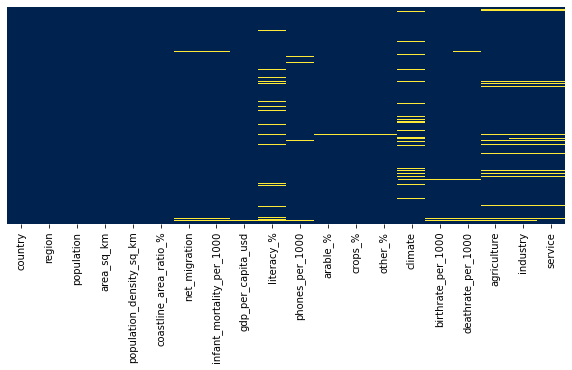

In [12]:
# Visualise missing data
plt.figure(figsize=(10,4))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='cividis');

Now lets have a look at some of the distributions of our data.


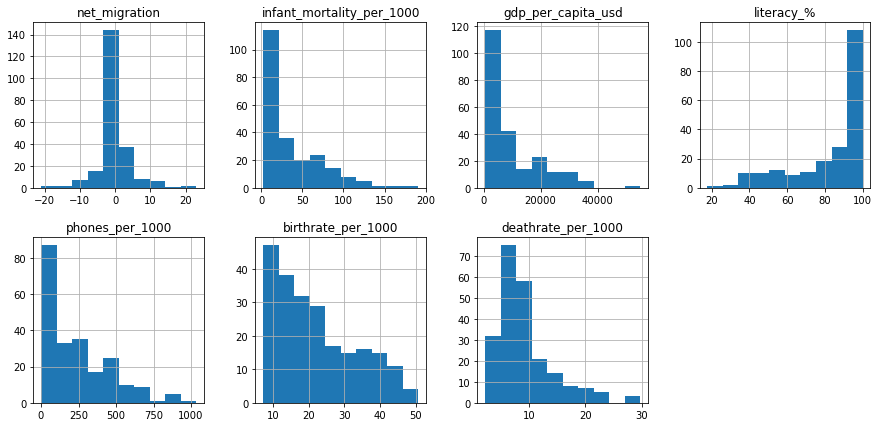

In [13]:
# List of columns for histograms
cols = [
    'net_migration', 
    'infant_mortality_per_1000', 
    'gdp_per_capita_usd', 
    'literacy_%', 
    'phones_per_1000', 
    'birthrate_per_1000', 
    'deathrate_per_1000',
]

# Plot histograms
data.hist(cols, figsize=(15,7), layout=(2,4));

Here we can see that a lot of our data has positive skew. Literacy, however, has negative skew and net migration appears more normally distributed. This means we may have to do some scaling/transformations before training our linear models.

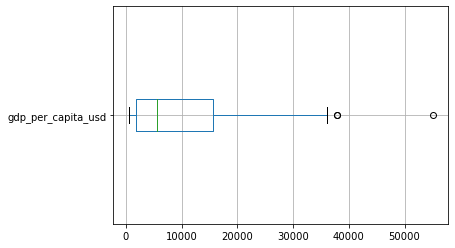

In [14]:
# Boxplot for GDP per capita
data.boxplot(['gdp_per_capita_usd'], vert=False);

From the boxplot above, we can see that there are a few outliers for our target variable (GDP per capita). We may have to look into these in more detail and decide whether to keep them or not.

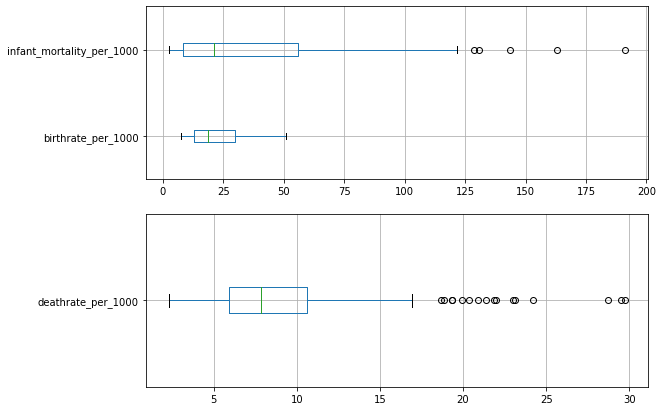

In [15]:
# Boxplots for infant mortality, birthrate and deathrate
fig, axs = plt.subplots(2, 1, figsize=(9,7))
data.boxplot(['birthrate_per_1000', 'infant_mortality_per_1000'], vert=False, ax=axs[0])
data.boxplot(['deathrate_per_1000'], vert=False, ax=axs[1]);

We can also see that there are quite a few outliers present in some of our features. deathrate_per_1000 for example has a significant amount of outliers. This may not be a problem and could just be representative of the data. However, for some of the other features that have more extreme outliers, they could pose a problem and we may have to either remove the outliers or transform our data before we train our linear models.

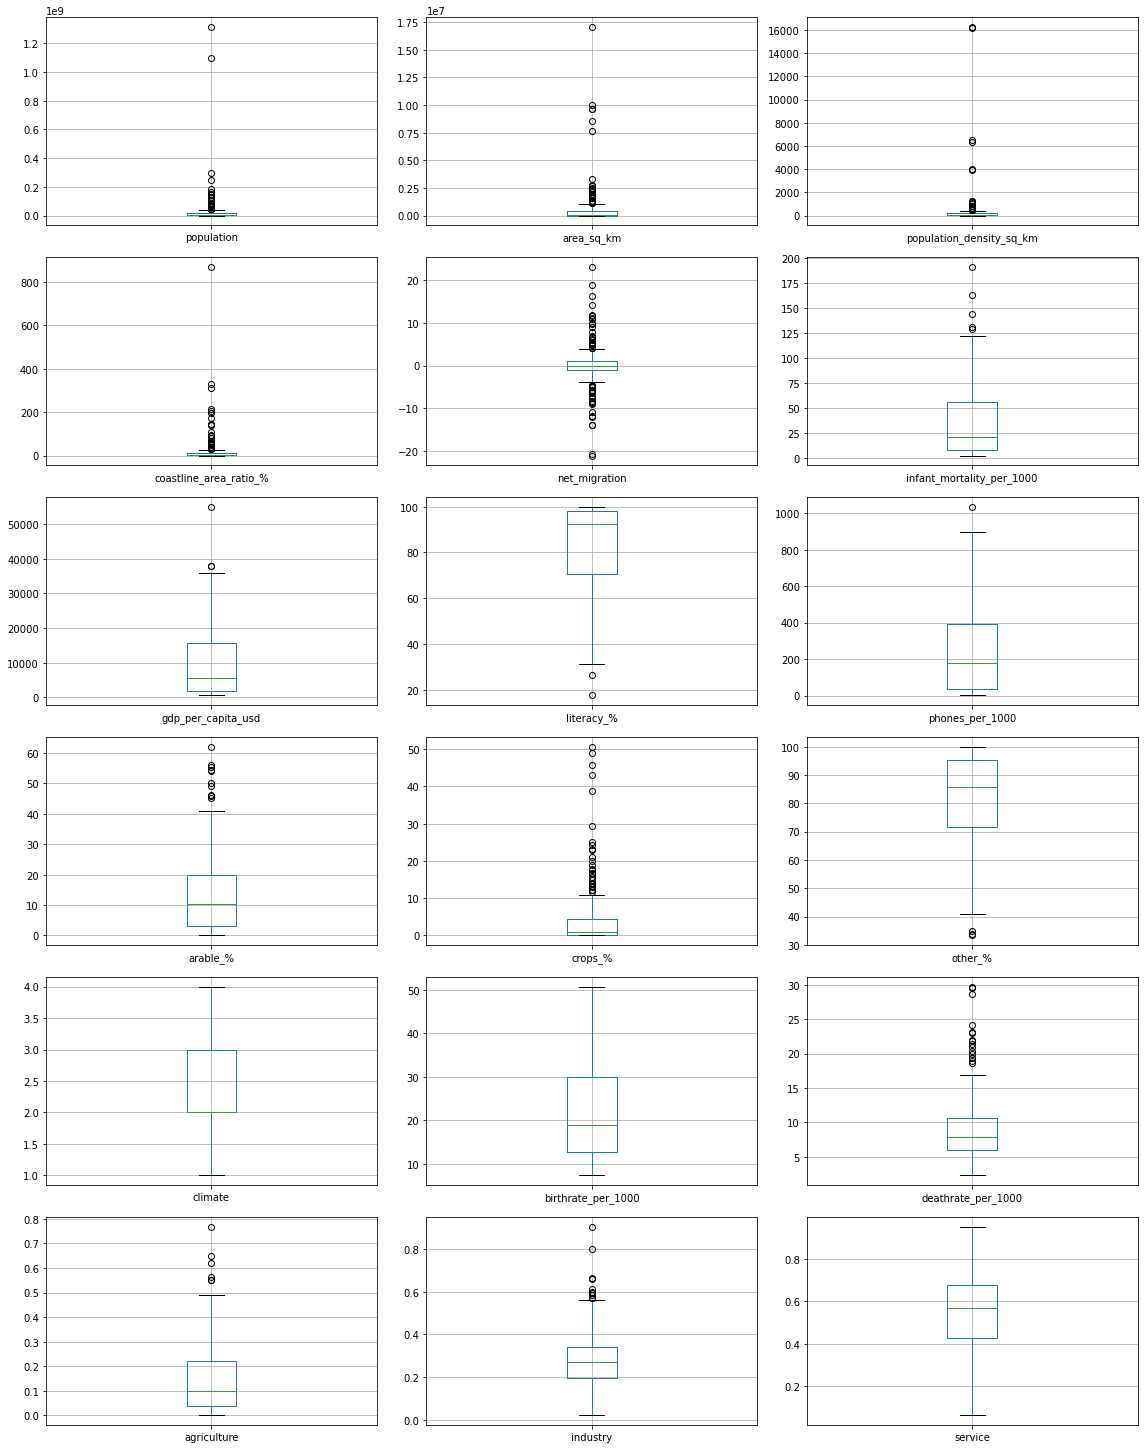

In [16]:
# Check overall outliers before filling null values
fig = plt.figure(figsize=(16,30))
features = list(data.columns[2:])
for i in range(len(features)):
    fig.add_subplot(9, 3, i+1)
    data.boxplot([features[i]])
plt.tight_layout()
plt.show()

Looking at all of our features, we can see that the majority of them have outliers. This is not surprising as we could see from our distribution plots that much of our data was positively skewed. Using the boxplots, we can also get a better understanding of how to handle our misisng data.

Due to the large number of outliers in our data, we will try applying scaling and transformations to some of our data splits before training our linear models. This should help to minimise the influence that these outliers may have on our final results. However, we must be careful not to overlook potential important relationships.

In [17]:
# Investigating undefined features
data[['country', 'region', 'climate', 'agriculture', 'industry', 'service']].head(10)

,country,region,climate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),1.0,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3.0,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,1.0,0.101,0.600,0.298
3,American Samoa,OCEANIA,2.0,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,3.0,NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,NaN,0.096,0.658,0.246
6,Anguilla,LATIN AMER. & CARIB,2.0,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,2.0,0.038,0.220,0.743
8,Argentina,LATIN AMER. & CARIB,3.0,0.095,0.358,0.547
9,Armenia,C.W. OF IND. STATES,4.0,0.239,0.343,0.418


We can see that agriculture, industry and service are sector percentages of each country's economy. e.g. Afghanistan's economy consists of 38% agriculture, 24% industry and 38% service - which totals 100%.

For climate, it is not clear what the values represent so we will have to look a little deeper into this feature.

In [18]:
# Investigating the climate values in more detail
data['climate'].unique()

array([1. , 3. , 2. , nan, 4. , 1.5, 2.5])

We can see that apart from null, climate could be one of 6 values (1, 1.5, 2, 2.5, 3, 4).

After a bit of research, it appears that the dataset classifies climate based closely on the Köppen climate classification. Below are what the following values represent:

| Value | Climate |
| :-: | :- |
| **1** | Dry tropical or tundra and ice |
| **1.5** | A mixture of dry and wet tropical |
| **2** | Wet tropical |
| **2.5** | A mixture of wet tropical and humid subtropical |
| **3** | Temperate humid subtropical and temperate continental |
| **4** | Dry hot summers and wet winters |


**Sources:**
* https://www.pnas.org/content/101/10/3715.full
* https://www.nationalgeographic.org/encyclopedia/koppen-climate-classification-system/

<a id="data_cleaning"></a>
## 5. Data Cleaning

In [19]:
# See how many nulls per column
data.isnull().sum()

country                       0
region                        0
population                    0
area_sq_km                    0
population_density_sq_km      0
coastline_area_ratio_%        0
net_migration                 3
infant_mortality_per_1000     3
gdp_per_capita_usd            1
literacy_%                   18
phones_per_1000               4
arable_%                      2
crops_%                       2
other_%                       2
climate                      22
birthrate_per_1000            3
deathrate_per_1000            4
agriculture                  15
industry                     16
service                      15
dtype: int64

Using the box plots earlier, we can decide to impute missing values with either median or mean depending on whether or not a feature has outliers. We will use the median and mean of the region as countries in the same region are more likely to share similar characteristics. Similarly, for climate, we will impute missing values using the region mode.

* `net_migration` - fill with region **median** due to many outliers
* `infant_mortality_per_1000` - fill with region **median** due to many outliers
* `gdp_per_capita_usd` - only West Sahara - fill with most accurate figure from 2007
* `literacy_%` - fill with region **median** due to a few outliers
* `phones_per_1000` - fill with region **median** due to a few outliers
* `arable_%` - fill with region **median** due to many outliers
* `crops_%` - fill with region **median** due to many outliers
* `other_%` - fill with region **median** due to many outliers
* `climate` - fill with region **mode** as climate is likely similar
* `birthrate_per_1000` - fill with region **mean** as there are no outliers
* `deathrate_per_1000` - fill with region **median** due to many outliers

In [20]:
# Impute values
data['net_migration'].fillna(data.groupby('region')['net_migration'].transform('median'), inplace=True)
data['infant_mortality_per_1000'].fillna(data.groupby('region')['infant_mortality_per_1000'].transform('median'), inplace=True)
data['gdp_per_capita_usd'].fillna(2500, inplace=True)
data['literacy_%'].fillna(data.groupby('region')['literacy_%'].transform('median'), inplace= True)
data['phones_per_1000'].fillna(data.groupby('region')['phones_per_1000'].transform('median'), inplace= True)
data['arable_%'].fillna(data.groupby('region')['arable_%'].transform('median'), inplace=True)
data['crops_%'].fillna(data.groupby('region')['crops_%'].transform('median'), inplace=True)
data['other_%'].fillna(data.groupby('region')['other_%'].transform('median'), inplace=True)
data['climate'].fillna(data.groupby('region')['climate'].transform(lambda x: x.mode().max()), inplace=True)
data['birthrate_per_1000'].fillna(data.groupby('region')['birthrate_per_1000'].transform('mean'), inplace= True)
data['deathrate_per_1000'].fillna(data.groupby('region')['deathrate_per_1000'].transform('median'), inplace= True)

In [21]:
# Check null values for agriculture, industry and service
data[data['industry'].isnull()][['country', 'region', 'agriculture', 'industry', 'service']]

,country,region,agriculture,industry,service
3,American Samoa,OCEANIA,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,NaN,NaN,NaN
78,Gibraltar,WESTERN EUROPE,NaN,NaN,NaN
80,Greenland,NORTHERN AMERICA,NaN,NaN,NaN
83,Guam,OCEANIA,NaN,NaN,NaN
134,Mayotte,SUB-SAHARAN AFRICA,NaN,NaN,NaN
138,Monaco,WESTERN EUROPE,0.17,NaN,NaN
140,Montserrat,LATIN AMER. & CARIB,NaN,NaN,NaN
144,Nauru,OCEANIA,NaN,NaN,NaN
153,N. Mariana Islands,OCEANIA,NaN,NaN,NaN


In [22]:
# Check means for each sector along with sum of row
df_sectors = pd.pivot_table(data, index='region', values=['agriculture', 'industry', 'service'])
df_sectors['sum'] = df_sectors.sum(axis=1)
df_sectors

,agriculture,industry,service,sum
region,,,,
ASIA (EX. NEAR EAST),0.177643,0.302143,0.520107,0.999893
BALTICS,0.045000,0.293333,0.661667,1.000000
C.W. OF IND. STATES,0.192000,0.328000,0.480167,1.000167
EASTERN EUROPE,0.092167,0.309250,0.598667,1.000083
LATIN AMER. & CARIB,0.091023,0.256116,0.650721,0.997860
NEAR EAST,0.063812,0.406000,0.530000,0.999813
NORTHERN AFRICA,0.135000,0.426200,0.432000,0.993200
NORTHERN AMERICA,0.014000,0.199333,0.787000,1.000333
OCEANIA,0.175125,0.215250,0.608937,0.999312


To impute the missing data for sectors (agriculture, industry, service), we will first find out what the mean value is for each sector in each region. From here, we can estimate the missing sector values for Monaco and Western Sahara. For all of the other missing sector values, we will use the region sector mean.

In [23]:
# Assign specific values to countries that have values for at least one sector
data.loc[data['country'] == 'Monaco', 'industry'] = 0.18
data.loc[data['country'] == 'Monaco', 'service'] = 0.65
data.loc[data['country'] == 'Western Sahara', 'agriculture'] = 0.15
data.loc[data['country'] == 'Western Sahara', 'industry'] = 0.45

# Fill the remaining null values for each sector with region mean as all of them add up close enough to 100%
data['agriculture'].fillna(data.groupby('region')['agriculture'].transform('mean'), inplace=True)
data['industry'].fillna(data.groupby('region')['industry'].transform('mean'), inplace=True)
data['service'].fillna(data.groupby('region')['service'].transform('mean'), inplace=True)

In [24]:
# Check to see if data has no missing values
data.isnull().sum().sum()

0

In [25]:
# Pickle cleaned dataframe
data.to_pickle("./cotw_cleaned.pkl")

<a id="eda"></a>
## 6. EDA

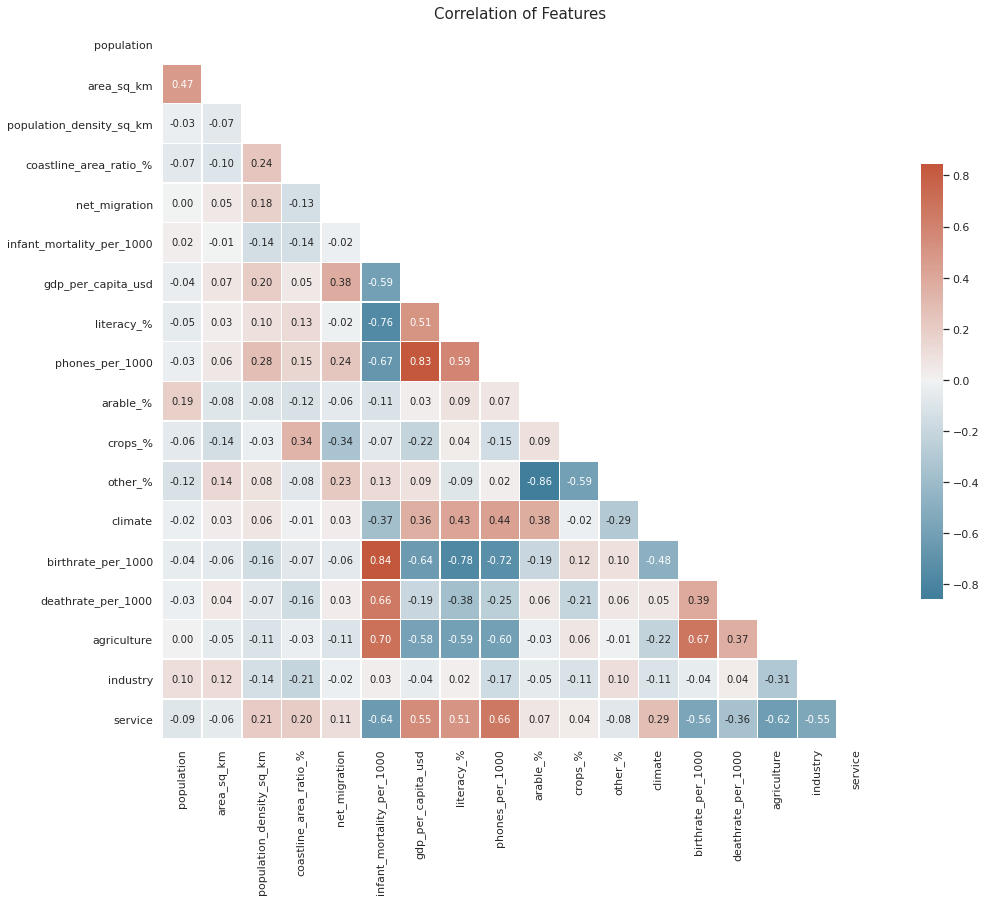

In [26]:
# Correlation
data_corr = data.corr()
sns.set_theme(style='white')
fig, ax = plt.subplots(figsize=(16, 16))
mask = np.triu(np.ones_like(data_corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax.set_title('Correlation of Features', fontsize=15)
sns.heatmap(
    data_corr, mask=mask, cmap=cmap, annot=True, fmt='.2f', center=0, 
    square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot_kws={'size': 10}
);

From the correlation heatmap, we can see that we have quite a few strong correlations. Below are a few interesting observations:

* `birthrate_per_1000` has a **strong positive** correlation with `infant_mortality_per_1000` - This makes sense. As more people are born in a population, the chances of infant mortality tend to go up.


* `phones_per_1000` has a **strong positive** correlation with `gdp_per_capita_usd` - This is an interesting and unexpected correlation that seems to indicate that populations with more phones tend to have higher GDP per capita. It could also simply be that individuals in countries with a higher GDP per capita have more money to spend on technology such as phones.


* `literacy_%` has a **strong negative** correlation with `birthrate_per_1000` - This indicates that as literacy rates increase, number of births drop or vice versa. This could be due to younger adults being in education for longer in some countries and thus not producing as much offspring as those who grow up in more remote regions with less access to education, however, this is just speculation.

Let's take a look at some of the strong correlations we have with GDP per capita.

In [60]:
# Set style for seaborn plots
sns.set(style='darkgrid', palette='muted', font_scale=1)

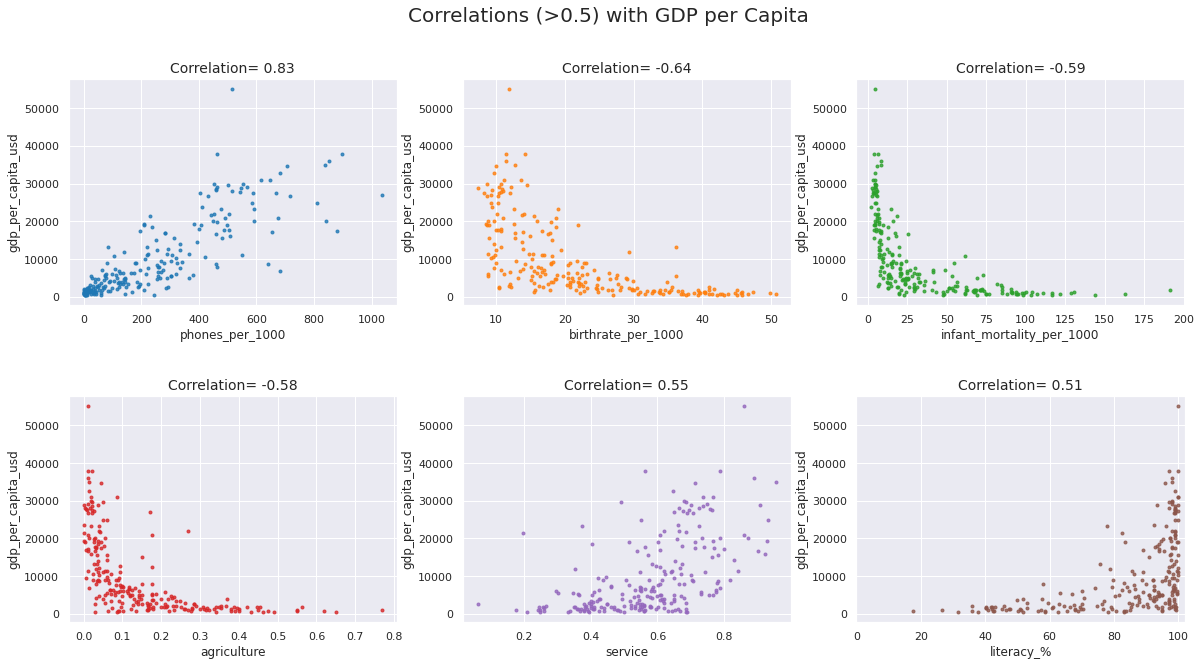

In [28]:
# Plot regplots with features that have correlations with gdp_per_capita over 0.5
fig, axes = plt.subplots(2, 3, figsize=(20,10))
plt.subplots_adjust(hspace=0.4)
plt.suptitle('Correlations (>0.5) with GDP per Capita', fontsize=20)

corr_to_gdp = pd.Series(dtype='float64')
for col in data.columns.values[2:]:
    if ((col != 'gdp_per_capita_usd') & (col != 'climate')):
        corr_to_gdp[col] = data['gdp_per_capita_usd'].corr(data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

palette = sns.color_palette('tab10', len(corr_to_gdp))

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='gdp_per_capita_usd', data=data,
                   ax=axes[i,j], fit_reg=False, marker='.', color=palette[i*3+j])
        title='Correlation= ' + str(round(corr_to_gdp[i*3+j],2))
        axes[i,j].set_title(title, fontsize=14)
axes[1,2].set_xlim(0,102)
plt.show()

Here we can see that there are definitely some interesting relationships (linear and non-linear). Below are some observations:

* `agriculture` has a negative correlation with `gdp_per_capita_usd` - This indicates that as countries become wealthier, their agricultural sector shrinks. Similarly, it could mean that as a country focuses more on agriculture, its wealth decreases. This could be due to the growth of the service sector across the globe.


* `service` has a positive correlation with `gdp_per_capita_usd` - This indicates that as the proportion of service sector work in a country's economy increases, the more likely that GDP per capita also increases and vice versa. This is consistent with the previous observation. 

<a id="eda_region"></a>
#### 6.1. Region

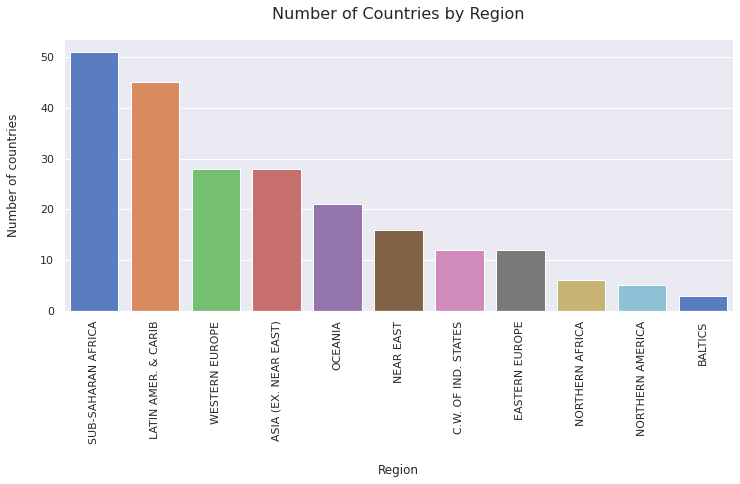

In [29]:
# Show number of countries by region
region = data['region'].value_counts()
plt.figure(figsize=(12,5))
sns.barplot(x=region.index, y=region.values, palette='muted')
plt.xticks(rotation=90)
plt.ylabel('Number of countries', labelpad=20)
plt.xlabel('Region', labelpad=20)
plt.title('Number of Countries by Region', fontsize=16, pad=20);

Here we can see that Sub-Saharan Africa contains the most countries, around 51, which is not surprising given its huge land mass. Latin America and the Caribbean are not too far behind with around 45 countries in the region. Western Europe and Asia appear to have the same number of countries in their region, around 28.

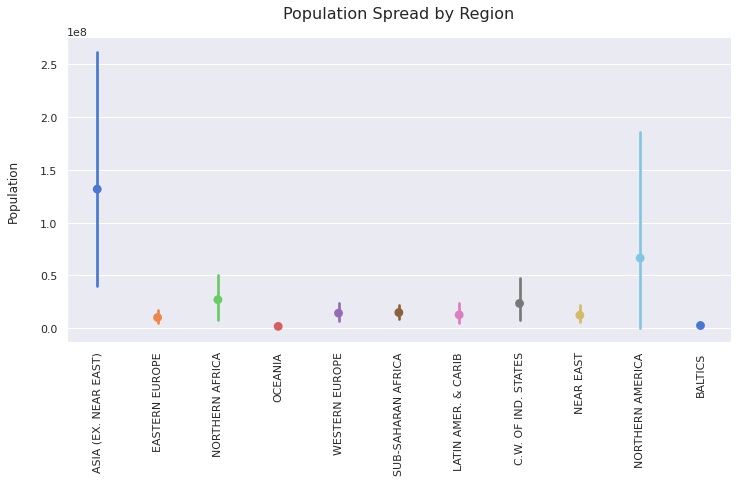

In [30]:
# Show population by region
sns.catplot(x='region', y='population', data=data, kind='point', palette='muted', height=5, aspect=2)
plt.title('Population Spread by Region', fontsize=16, pad=20)
plt.xlabel('')
plt.ylabel('Population', labelpad=20)
plt.xticks(rotation=90);

Here we can see that the Asian and Northern American regions have a wide population spread compared to other regions. This is most likely due to countries such as China and the United States which both have high populations.

<a id="eda_climate"></a>
#### 6.2. Climate

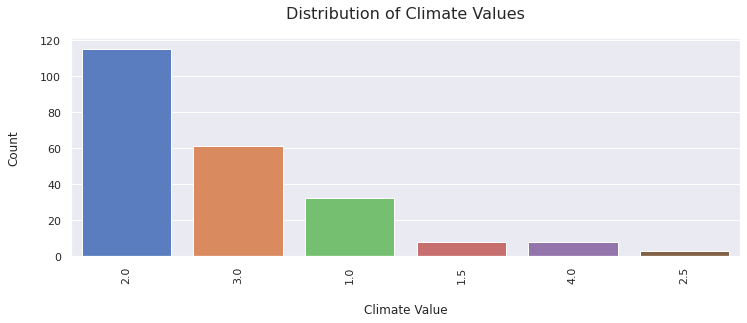

In [31]:
# Show count of climate values
climate = data['climate'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=climate.index, y=climate.values, order=climate.index)
plt.xticks(rotation=90)
plt.ylabel('Count', labelpad=20)
plt.xlabel('Climate Value', labelpad=20)
plt.title('Distribution of Climate Values', fontsize=16, pad=20);

We can also see that the majority of countries fall within climate 2 (wet tropical) and 3 (temperate humid subtropical and temperate continental).

<a id="eda_sectors"></a>
#### 6.3. Sectors

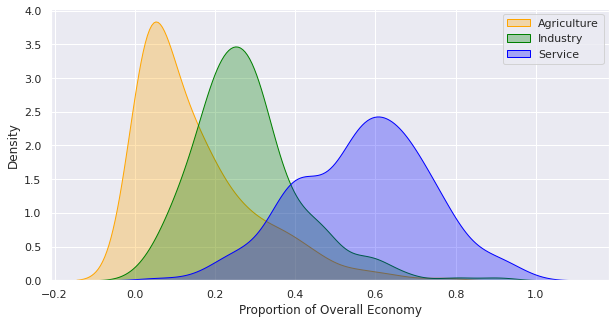

In [32]:
# Proportion of each sector
plt.figure(figsize=(10,5))
sns.kdeplot(data['agriculture'], color='orange', shade=True, alpha=.3, label='Agriculture')
sns.kdeplot(data['industry'], color='green', shade=True, alpha=.3, label='Industry')
sns.kdeplot(data['service'], color='blue', shade=True, alpha=.3, label='Service')
plt.xlabel('Proportion of Overall Economy')
plt.legend();

Here, the KDE plots help us to make some observations about each of the sectors in our data:

* `agriculture` - The agricultural sector makes up the smallest proportion (10% or less) of the overall economy for the majority of countries. This makes sense. As a civilization, we have advanced to a point where not only have crop yields  grown significantly but technology has also helped to automate and mechanise much of the agricultural production process allowing countries to advance in other sectors.


* `industry` - The industrial sector makes up a larger proportion of the economy than agriculture. Specifically, it makes up on average between around 20–35% of the overall economy for most countries. Like agriculture, much of the industrial sector is now heavily automated or optimised, and this will likely continue as more countries develop. This means we may see the industry sector make up less of the overall economy for more countries in the future.


* `service` - With agriculture and industry both making up less than 50% of the overall economy, most countries now rely heavily on the service sector. In fact, the service sector makes up the largest proportion of the economy for the majority of countries, averaging between 40–80% of the overall economy. It also has the widest distribution meaning that some countries' economy is almost solely based on the service sector, whereas for other countries, it only makes up 20% or less.

As we know, the data we have is somewhat outdated so it is likely that today, the service sector has grown even further. This could mean that more countries today rely more on the service sector and even less on agriculture and industry.

<a id="eda_gdp"></a>
#### 6.4. GDP per Capita

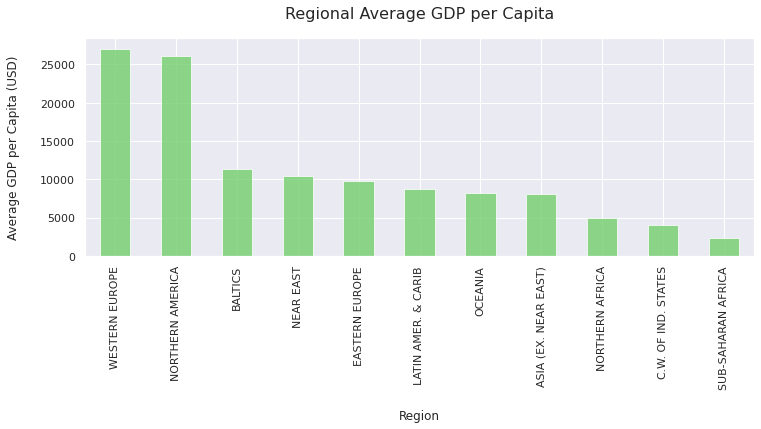

In [33]:
# GDP per capita by region
data.groupby('region')['gdp_per_capita_usd'].mean().sort_values(ascending=False).plot(
    kind='bar', color='g', alpha=0.75, figsize=(12,4))
plt.title('Regional Average GDP per Capita', fontsize=16, pad=20)
plt.xlabel('Region', labelpad=20)
plt.ylabel('Average GDP per Capita (USD)', labelpad=20);

Not surprisingly, we can see that average GDP per capita is highest in Western Europe and Northern America.

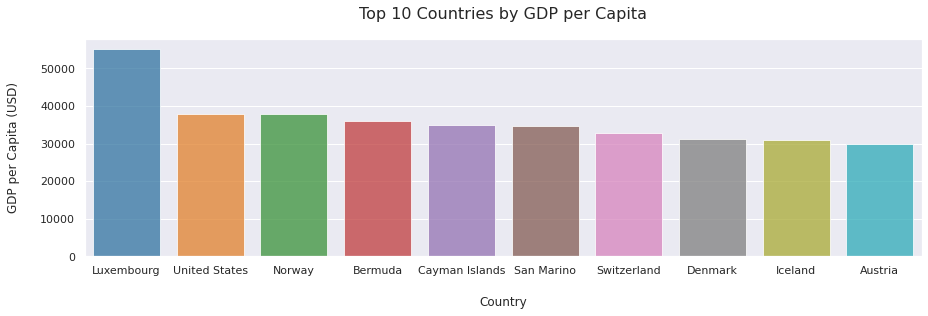

In [34]:
# Top GDP per capita countries
plt.figure(figsize=(15, 4))
top_ten = data.sort_values(['gdp_per_capita_usd'], ascending=False)[['country', 'gdp_per_capita_usd']].head(10)
sns.barplot(x='country', y='gdp_per_capita_usd', data=top_ten, palette='tab10', alpha=0.75)
plt.title('Top 10 Countries by GDP per Capita', fontsize=16, pad=20)
plt.xlabel('Country', labelpad=20)
plt.ylabel('GDP per Capita (USD)', labelpad=20);

When we look at the top 10 countries by GDP per capita, we can see that Luxembourg earns considerably more than other countries and almost $20,000 more than the next highest, the United States. This is the outlier we saw earlier in our box plots. However, as this is not an erroneous value, it would make more sense not to remove Luxembourg from our data.

<a id="eda_summary"></a>
#### 6.5. EDA Summary of Findings
---

* **phones_per_1000** was strongly positively correlated with **gdp_per_capita_usd** but it is not exactly clear why this might be. It would be interesting to look into this further to see why such a strong correlation exists.


* **agriculture** was negatively correlated with **gdp_per_capita_usd** which seems to indicate that countries whose economies rely more on the agricultural sector tend to have a lower GDP per capita.


* **agriculture** was the smallest proportion **(10% or less)** of the economy for the majority of countries, whereas the **service** sector made up a much larger proportion **(40–80%)**.


* **Luxembourg** appears to have a considerably **higher GDP per Capita**, even amongst other countries within the top 10. With a quick internet search, we can find out why this may be. The following excerpt is from an article written in 2015 for [Independent.com](https://www.independent.com/2015/01/11/luxembourg-country-highest-gdp-per-capita/#:~:text=Because%20of%20this%2C%20Luxembourg%20is,unusually%20high%20GDP%20per%20capita.):


>*"Although Luxembourg is a small country, both in population and land mass, it has a variety of political, social, and economic factors that over the years have enabled the country to develop a highly sophisticated, post-industrial, tech-driven service economy. Because of this, Luxembourg is known around the world as a business-friendly country, with low corporate taxes, a stable work force, and government incentives with respect to investment, all of which — with its small population — results in an unusually high GDP per capita."*

<a id="model_building"></a>
## 7. Model Building

In [35]:
# Import libraries for models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.eval_measures import rmse
from yellowbrick.regressor import AlphaSelection

#### Data Preprocessing

In [36]:
# Get dummies for categorical variables
data_final = pd.get_dummies(data.iloc[:,1:], drop_first=True)
data_final.head()

,population,area_sq_km,population_density_sq_km,coastline_area_ratio_%,net_migration,infant_mortality_per_1000,gdp_per_capita_usd,literacy_%,phones_per_1000,arable_%,...,region_BALTICS,region_C.W. OF IND. STATES,region_EASTERN EUROPE,region_LATIN AMER. & CARIB,region_NEAR EAST,region_NORTHERN AFRICA,region_NORTHERN AMERICA,region_OCEANIA,region_SUB-SAHARAN AFRICA,region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1


In [37]:
# Pickle preprocessed dataframe
data_final.to_pickle('./cotw_preprocessed.pkl')

#### Data Splitting

As we saw earlier, much of our data was not normally distributed. This could cause problems for our linear models and thus our results may be unreliable. Therefore, we will split the data 6 different ways to see the difference in results between each split. The data will be split in the following ways:

* **Data Split 1:** All Features, No Scaling
* **Data Split 2:** All Features, with Scaling
* **Data Split 3:** Selected Features, No Scaling
* **Data Split 4:** Selected Features, with Scaling
* **Data Split 5:** All Features, with Log Transformation
* **Data Split 6:** Selected Features, with Log Transformation

For the selected features, we will use those features which have a correlation of over 0.3 with GDP per capita.

##### Data Split 1: All Features, No Scaling 

In [38]:
# Isolate variables
X = data_final.drop('gdp_per_capita_usd', axis=1)
y = data_final['gdp_per_capita_usd']

# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Data Split 2: All Features, with Scaling

In [39]:
# Isolate variables
X2 = X.copy()
y2 = y.copy()

# Create train/test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Scale and transform
sc_2 = StandardScaler()
X2_train_sc = sc_2.fit_transform(X2_train)
X2_test_sc = sc_2.transform(X2_test)

##### Data Split 3: Selected Features, No Scaling 

In [40]:
# Correlations between GDP per capita and all features
X_all = data_final[data_final.columns].corr()['gdp_per_capita_usd'].abs().sort_values(ascending=False)[1:]

# Extract all correlations over 0.3
X_selected = X_all[X_all > 0.3]
cols = list(X_selected.index)
X_selected = X[cols]

# Isolate variables
X3 = X_selected
y3 = data_final['gdp_per_capita_usd']

# Create train/test split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

##### Data Split 4: Selected Features, with Scaling 

In [41]:
# Isolate variables
X4 = X_selected.copy()
y4 = y.copy()

# Create train/test split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Scale and transform
sc_4 = StandardScaler()
X4_train_sc = sc_4.fit_transform(X4_train)
X4_test_sc = sc_4.transform(X4_test)

##### Data Split 5: All Features, with Log Transformation

In [42]:
# Calculate maximum negative to remove all negative integers
max_neg_all = abs(X_train.min().min())

In [43]:
# Isolate variables
X5 = X.copy()
y5 = y.copy()

# Create train/test split
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)

# Log transform all but y5_test as we will convert predictions back before calculating errors
X5_train_log = np.log1p(X5_train + max_neg_all)
X5_test_log = np.log1p(X5_test + max_neg_all)
y5_train_log = np.log1p(y5_train + max_neg_all)

##### Data Split 6: Selected Features, with Log Transformation

In [44]:
# Calculate maximum negative to remove all negative integers
max_neg_selected = abs(X3_train.min().min())

In [45]:
# Isolate variables
X6 = X_selected.copy()
y6 = y.copy()

# Create train/test split
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.2, random_state=42)

# Log transform all but y6_test as we will convert predictions back before calculating errors
X6_train_log = np.log1p(X6_train + max_neg_selected)
X6_test_log = np.log1p(X6_test + max_neg_selected)
y6_train_log = np.log1p(y6_train + max_neg_selected)

<a id="linear_regression"></a>
### 7.1. Linear Regression

First, let's use a linear regression model to get our baseline score and also to look into the coefficients to determine feature importances.

##### Training

In [46]:
# Train linear regression models
lr1 = LinearRegression().fit(X_train, y_train)
lr2 = LinearRegression().fit(X2_train_sc, y2_train)
lr3 = LinearRegression().fit(X3_train, y3_train)
lr4 = LinearRegression().fit(X4_train_sc, y4_train)
lr5 = LinearRegression().fit(X5_train_log, y5_train_log)
lr6 = LinearRegression().fit(X6_train_log, y6_train_log)

##### Predictions

In [47]:
# Make predictions using trained models
lr1_pred = lr1.predict(X_test)
lr2_pred = lr2.predict(X2_test_sc)
lr3_pred = lr3.predict(X3_test)
lr4_pred = lr4.predict(X4_test_sc)
lr5_pred = lr5.predict(X5_test_log)
lr6_pred = lr6.predict(X6_test_log)

# Convert log predictions back to original values
lr5_pred = np.expm1(lr5_pred) - max_neg_all
lr6_pred = np.expm1(lr6_pred) - max_neg_selected

##### Model Evaluation

In [48]:
# Print error scores for each model
print('Linear Regression Performance:')
print('-'*30)
print('\nAll Features, No Scaling:')
print('MAE:', mean_absolute_error(y_test, lr1_pred))
print('RMSE:', rmse(y_test, lr1_pred))
print('R² Score:', r2_score(y_test, lr1_pred))
print('-'*30)
print('\nAll Features, with Scaling:')
print('MAE:', mean_absolute_error(y2_test, lr2_pred))
print('RMSE:', rmse(y2_test, lr2_pred))
print('R² Score:', r2_score(y2_test, lr2_pred))
print('-'*30)
print('\nSelected Features, No Scaling:')
print('MAE:', mean_absolute_error(y3_test, lr3_pred))
print('RMSE:', rmse(y3_test, lr3_pred))
print('R² Score:', r2_score(y3_test, lr3_pred))
print('-'*30)
print('\nSelected Features, with Scaling:')
print('MAE:', mean_absolute_error(y4_test, lr4_pred))
print('RMSE:', rmse(y4_test, lr4_pred))
print('R² Score:', r2_score(y4_test, lr4_pred))
print('-'*30)
print('\nAll Features, Log Transformed:')
print('MAE:', mean_absolute_error(y_test, lr5_pred))
print('RMSE:', rmse(y_test, lr5_pred))
print('R² Score:', r2_score(y_test, lr5_pred))
print('-'*30)
print('\nSelected Features, Log Transformed:')
print('MAE:', mean_absolute_error(y_test, lr6_pred))
print('RMSE:', rmse(y_test, lr6_pred))
print('R² Score:', r2_score(y_test, lr6_pred))
print('-'*30)

Linear Regression Performance:
------------------------------

All Features, No Scaling:
MAE: 2505.902843379598
RMSE: 3315.912709169906
R² Score: 0.8677745447332085
------------------------------

All Features, with Scaling:
MAE: 2505.902844307465
RMSE: 3315.912710489283
R² Score: 0.8677745446279854
------------------------------

Selected Features, No Scaling:
MAE: 2617.838749151158
RMSE: 3514.7322779477327
R² Score: 0.8514429071449725
------------------------------

Selected Features, with Scaling:
MAE: 2617.838749151155
RMSE: 3514.732277947729
R² Score: 0.8514429071449727
------------------------------

All Features, Log Transformed:
MAE: 2230.4050919983697
RMSE: 3331.3346394270247
R² Score: 0.8665417537005474
------------------------------

Selected Features, Log Transformed:
MAE: 2323.154311860399
RMSE: 3258.5094705552033
R² Score: 0.8723129458444621
------------------------------


Here we can see that all of our results are quite similar. Scaling the features did not seem to improve our results, however, the best result appears to be the **'Selected Features, Log Transformed'** data split. 

An RMSE of $3258.51 and an R² Score of 0.87 is a good baseline to begin with. Before we try to improve the results, let's look deeper into our features. We will use the statsmodels package to do this.

In [49]:
# Create and fit sm model to data split 6 (selected features, log transformed)
lr_sm6 = sm.OLS(y6_train_log, sm.add_constant(X6_train_log)).fit()
print(lr_sm6.summary())

                            OLS Regression Results                            
Dep. Variable:     gdp_per_capita_usd   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     78.38
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           2.43e-58
Time:                        03:16:45   Log-Likelihood:                -133.26
No. Observations:                 181   AIC:                             288.5
Df Residuals:                     170   BIC:                             323.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

From the statsmodels summary, it looks like we may have multicollinearity in our data so we will check for it using variance inflation factor (VIF).

In [50]:
# Check for multicollinearity using data split 6 (selected features, log transformed)
X6_constant = sm.add_constant(X6_train_log)
vif = pd.DataFrame()
vif['Features'] = X6_constant.columns
vif['VIF'] = [variance_inflation_factor(X6_constant.values, i) for i in range(X6_constant.shape[1])]
vif[vif['VIF']>5][1:]

,Features,VIF
1,phones_per_1000,7.203678
3,birthrate_per_1000,5.436619
4,infant_mortality_per_1000,6.290715


These values are not particularly high but it does look like we have some slight multicollinearity. This may be because, as we saw earlier in our analysis, some features are highly correlated with each other. We will remove `infant_mortality_per_1000` and `birthrate_per_1000` but keep `phones_per_1000` because this feature seems to have the strongest relationship with `gdp_per_capita_usd`.

In [52]:
# Run regression without infant_mortality_per_1000 and birthrate_per_1000

# Isolate variables
X7 = X_selected.copy()
X7 = X7.drop(columns=['infant_mortality_per_1000', 'birthrate_per_1000'])
y7 = y.copy()

# Create train/test split
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.2, random_state=42)

# Calculate maximum negative to remove all negative integers
max_neg_mr = abs(X7_train.min().min())

# Log transform all but y7_test as we will convert predictions back before calculating errors
X7_train_log = np.log1p(X7_train + max_neg_mr)
X7_test_log = np.log1p(X7_test + max_neg_mr)
y7_train_log = np.log1p(y7_train + max_neg_mr)

# Train model
lr7 = LinearRegression()
lr7.fit(X7_train_log, y7_train_log)

# Make predictions using trained model
lr7_pred = lr7.predict(X7_test_log)

# Convert log predictions back to original values
lr7_pred = np.expm1(lr7_pred) - max_neg_mr

# Model evaluation
print('Linear Regression Performance:')
print('-'*30)
print('\nLog Transformed, Multicollinearity Removed:')
print('MAE:', mean_absolute_error(y7_test, lr7_pred))
print('RMSE:', rmse(y7_test, lr7_pred))
print('R² Score:', r2_score(y7_test, lr7_pred))
print('-'*30)

Linear Regression Performance:
------------------------------

Log Transformed, Multicollinearity Removed:
MAE: 2317.301647924383
RMSE: 3129.045211321014
R² Score: 0.8822576854085113
------------------------------


It looks like we managed to improve our model slightly. Let's check the VIF of our features again to make sure we eliminated multicollinearity from our data.

In [53]:
# Check to see if we no longer have multicollinearity
X7_constant = sm.add_constant(X7_train_log)
vif = pd.DataFrame()
vif['Features'] = X7_constant.columns
vif['VIF'] = [variance_inflation_factor(X7_constant.values, i) for i in range(X7_constant.shape[1])]
vif[1:]

,Features,VIF
1,phones_per_1000,4.495801
2,region_WESTERN EUROPE,1.438381
3,agriculture,2.622207
4,service,1.992403
5,literacy_%,2.384439
6,region_SUB-SAHARAN AFRICA,1.753318
7,net_migration,1.066372
8,climate,1.403673


It looks like we were able to remove the multicollinearity. Let's run the regression one last time so we can look at feature importance.

In [54]:
# Create and fit sm model to data split 7 (log transformed, multicollinearity removed)
lr_sm7 = sm.OLS(y7_train_log, sm.add_constant(X7_train_log)).fit()
print(lr_sm7.summary())

                            OLS Regression Results                            
Dep. Variable:     gdp_per_capita_usd   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     82.26
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           9.30e-55
Time:                        03:31:45   Log-Likelihood:                -146.89
No. Observations:                 181   AIC:                             311.8
Df Residuals:                     172   BIC:                             340.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

With the mulitcollinearity removed, we can now be much more confident interpreting the coefficients and determining feature importance. From the coefficients above, we can see the percent increase or decrease in GDP per capita from a 1% increase in each feature assuming all of the other features remain constant. For example, a 1% increase in phones_per_1000 represents a 0.78% rise in GDP per capita. Similarly, a 1% increase in agriculture represents a 36.73% decrease in GDP per capita. This is consistent with what we found earlier in our analysis.

#### Feature Importance

Let's now have a closer look at feature importance in our model. Before we do this however, we must extract only the features which are statistically significant at the **<0.05** level.

In [55]:
# Find statistically significant features
sig_ivs7 = [(feature, p_value) for feature, p_value in list(zip(list(X7.columns),list(lr_sm7.pvalues[1:])))
           if p_value < 0.05]
sig_ivs7

[('phones_per_1000', 1.318448437480471e-17),
 ('region_WESTERN EUROPE', 0.0012252875796557475),
 ('agriculture', 0.000600435229179039),
 ('net_migration', 0.014353779814802297)]

In [56]:
# Names of features which are statistically significant
sig_ivs_names7 = [x for (x, y) in sig_ivs7]
sig_ivs_names7

['phones_per_1000', 'region_WESTERN EUROPE', 'agriculture', 'net_migration']

In [57]:
# Coefficients for significant features (percentage change of y with a 1% increase in X)
features_list7 = list(zip(list(X7.columns), list(lr_sm7.params[1:])))
coefs_of_sig_ivs7 = [y for (x, y) in features_list7 if x in sig_ivs_names7]
coefs_of_sig_ivs7

[0.7756025756543703,
 11.747361333055583,
 -36.72708692050541,
 0.2813892522848347]

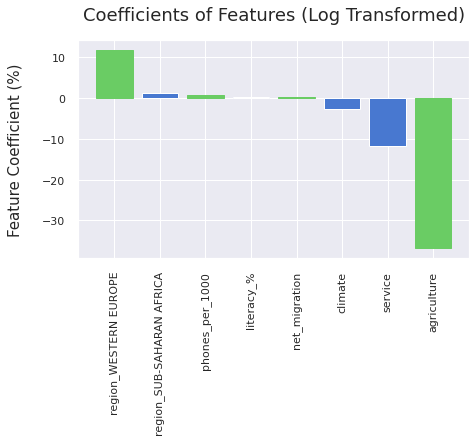

In [61]:
# Plot coefficients of features (green bars indicate statistically significant features)
df_features7 = pd.DataFrame(features_list7, columns=['Feature', 'Coefficient'])
df_sorted_desc7 = df_features7.sort_values('Coefficient', ascending=False)
plt.figure(figsize=(7,4))
coef_of_features7 = plt.bar('Feature', 'Coefficient', data=df_sorted_desc7)
plt.xticks(rotation=90)
plt.ylabel('Feature Coefficient (%)', size=15, labelpad=20)
plt.title('Coefficients of Features (Log Transformed)', size=18, pad=20)
coef_of_features7[0].set_color('g')
coef_of_features7[2].set_color('g')
coef_of_features7[4].set_color('g')
coef_of_features7[7].set_color('g')

Here we can see the feature importances, however, only the features in green are statistically significant. We can see that `agriculture` has the highest feature importance with `region_WESTERN EUROPE` having the next highest. While `phones_per_1000` and `net_migration` are also significant, their feature importance is relatively small. These results are all consistent with what we found in our analysis earlier. 

For example, we saw that agriculture was negatively correlated with GDP per capita. We also saw from our 'Regional Average GDP per Capita' graph that countries in Western Europe tend to be wealthier.

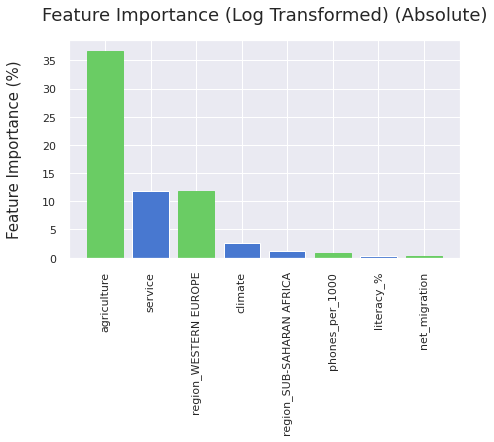

In [62]:
# Plot absolute coefficients of features
df_features_abs7 = df_features7.copy()
df_features_abs7['AbsCoefficient'] = df_features7['Coefficient'].abs()
df_abs_desc7 = df_features_abs7.sort_values('AbsCoefficient', ascending=False)
plt.figure(figsize=(7,4))
abs_feature_importance7 = plt.bar('Feature', 'AbsCoefficient', data=df_abs_desc7)
plt.xticks(rotation=90)
plt.ylabel('Feature Importance (%)', size=15, labelpad=20)
plt.title('Feature Importance (Log Transformed) (Absolute)', size=18, pad=20)
abs_feature_importance7[0].set_color('g')
abs_feature_importance7[2].set_color('g')
abs_feature_importance7[5].set_color('g')
abs_feature_importance7[7].set_color('g')

Here we can see the absolute feature importance of all of our selected features with the statistically significant features in green. Specifically, we can see that agriculture is around 3 times more important than the next most important feature.

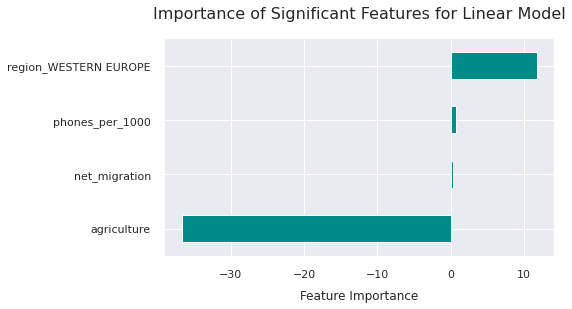

In [63]:
# Significant feature importances for linear model
sig_feat_imp = [(x, y) for (x, y) in features_list7 if x in sig_ivs_names7]
sig_feat_imp = pd.Series(dict(sig_feat_imp)).sort_values()
plt.figure(figsize=(7, 4))
sig_feat_imp.plot(kind='barh', color='darkcyan')
plt.title('Importance of Significant Features for Linear Model', fontsize=16, pad=20)
plt.xlabel('Feature Importance', labelpad=10);

Here we can see only the significant features and their importance.

Now let's see if we can improve our linear model further using normalization techniques. Because regularization penalises non-important features, we only need to use the **'All Features, with Scaling'** data split. First, we will find the optimum alpha, fit the data and then evaluate the models.

<a id="ridge_regression"></a>
### 7.2. Ridge Regression (L2)

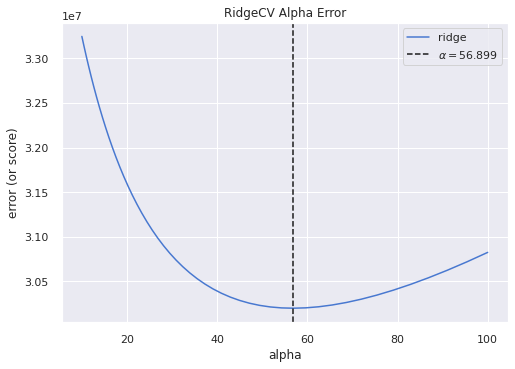

In [67]:
# Create a list of alphas to cross-validate against
alphas = np.logspace(1, 2, 50)

# Instantiate the linear model and visualizer
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X2_train_sc, y2_train)
visualizer.show()
ridge2_alpha = model.alpha_

In [70]:
# Ridge Regression

# Fit ridge model to data with optimum alpha and make predictions
ridge2 = Ridge(alpha=ridge2_alpha).fit(X2_train_sc, y2_train) 
ridge2_pred = ridge2.predict(X2_test_sc)

# Print error scores for ridge model
print('Ridge Regression Performance:')
print('-'*30)
print('\nAll Features, with Scaling:')
print('MAE:', mean_absolute_error(y2_test, ridge2_pred))
print('RMSE:', rmse(y2_test, ridge2_pred))
print('R² Score:', r2_score(y2_test, ridge2_pred))
print('-'*30)

Ridge Regression Performance:
------------------------------

All Features, with Scaling:
MAE: 2557.3982312448006
RMSE: 3187.3156817050194
R² Score: 0.8778315535040547
------------------------------


<a id="lasso_regression"></a>
### 7.3. Lasso Regression (L1)

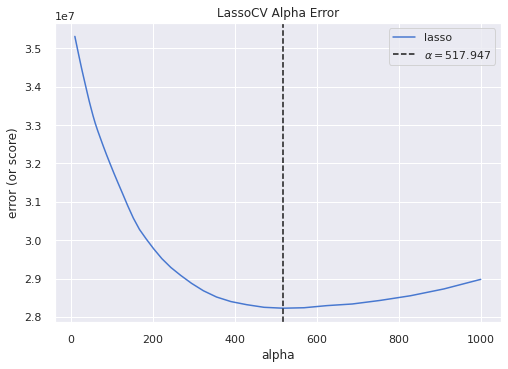

In [71]:
# Create a list of alphas to cross-validate against
alphas = np.logspace(1, 3, 50)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X2_train_sc, y2_train)
visualizer.show()
lasso2_alpha = model.alpha_

In [72]:
# Lasso Regression

# Fit lasso model to data with optimum alpha and make predictions
lasso2 = Lasso(alpha=lasso2_alpha).fit(X2_train_sc, y2_train)
lasso2_pred = lasso2.predict(X2_test_sc)

# Print error scores for each model
print('Lasso Regression Performance:')
print('-'*30)
print('\nAll Features, with Scaling:')
print('MAE:', mean_absolute_error(y2_test, lasso2_pred))
print('RMSE:', rmse(y2_test, lasso2_pred))
print('R² Score:', r2_score(y2_test, lasso2_pred))
print('-'*30)

Lasso Regression Performance:
------------------------------

All Features, with Scaling:
MAE: 2692.606780423387
RMSE: 3490.5759932784263
R² Score: 0.8534779159030981
------------------------------


It looks like neither the Ridge Regression or the Lasso Regression improved our model.

<a id="svr"></a>
### 7.4. SVR

Let's try using a Support Vector Regressor to see if we can improve upon our linear model.

##### Training

In [73]:
# Train SVR models
svr1 = SVR().fit(X_train, y_train)
svr2 = SVR().fit(X2_train_sc, y2_train)
svr3 = SVR().fit(X3_train, y3_train)
svr4 = SVR().fit(X4_train_sc, y4_train)
svr5 = SVR().fit(X5_train_log, y5_train_log)
svr6 = SVR().fit(X6_train_log, y6_train_log)
svr7 = SVR().fit(X7_train_log, y7_train_log)

##### Predictions

In [74]:
# Make predictions using trained models
svr1_pred = svr1.predict(X_test)
svr2_pred = svr2.predict(X2_test_sc)
svr3_pred = svr3.predict(X3_test)
svr4_pred = svr4.predict(X4_test_sc)
svr5_pred = svr5.predict(X5_test_log)
svr6_pred = svr6.predict(X6_test_log)
svr7_pred = svr7.predict(X7_test_log)

# Convert log predictions back to original values
svr5_pred = np.expm1(svr5_pred) - max_neg_all
svr6_pred = np.expm1(svr6_pred) - max_neg_selected
svr7_pred = np.expm1(svr7_pred) - max_neg_selected

##### Model Evaluation

In [75]:
# Print error scores for each model
print('SVR Performance:')
print('-'*30)
print('\nAll Features, No Scaling:')
print('MAE:', mean_absolute_error(y_test, svr1_pred))
print('RMSE:', rmse(y_test, svr1_pred))
print('R² Score:', r2_score(y_test, svr1_pred))
print('-'*30)
print('\nAll Features, with Scaling:')
print('MAE:', mean_absolute_error(y2_test, svr2_pred))
print('RMSE:', rmse(y2_test, svr2_pred))
print('R² Score: ', r2_score(y2_test, svr2_pred))
print('-'*30)
print('\nSelected Features, No Scaling:')
print('MAE:', mean_absolute_error(y3_test, svr3_pred))
print('RMSE:', rmse(y3_test, svr3_pred))
print('R² Score:', r2_score(y3_test, svr3_pred))
print('-'*30)
print('\nSelected Features, with Scaling:')
print('MAE:', mean_absolute_error(y4_test, svr4_pred))
print('RMSE:', rmse(y4_test, svr4_pred))
print('R² Score:', r2_score(y4_test, svr4_pred))
print('-'*30)
print('\nAll Features, Log Transformed:')
print('MAE:', mean_absolute_error(y5_test, svr5_pred))
print('RMSE:', rmse(y5_test, svr5_pred))
print('R² Score:', r2_score(y5_test, svr5_pred))
print('-'*30)
print('\nSelected Features, Log Transformed:')
print('MAE:', mean_absolute_error(y6_test, svr6_pred))
print('RMSE:', rmse(y6_test, svr6_pred))
print('R² Score:', r2_score(y6_test, svr6_pred))
print('-'*30)
print('\nLog Transformed, Multicollinearity Removed:')
print('MAE:', mean_absolute_error(y7_test, svr7_pred))
print('RMSE:', rmse(y7_test, svr7_pred))
print('R² Score:', r2_score(y7_test, svr7_pred))
print('-'*30)

SVR Performance:
------------------------------

All Features, No Scaling:
MAE: 6380.550819662578
RMSE: 9751.317195351554
R² Score: -0.14349813233364683
------------------------------

All Features, with Scaling:
MAE: 6371.650329010155
RMSE: 9742.117845584007
R² Score:  -0.14134160782093708
------------------------------

Selected Features, No Scaling:
MAE: 6357.017094757837
RMSE: 9730.586589683327
R² Score: -0.13864130932519814
------------------------------

Selected Features, with Scaling:
MAE: 6367.846583541467
RMSE: 9739.16732754602
R² Score: -0.14065037433283734
------------------------------

All Features, Log Transformed:
MAE: 3590.5715231184004
RMSE: 5349.204992627397
R² Score: 0.6558978588673801
------------------------------

Selected Features, Log Transformed:
MAE: 2845.292270822544
RMSE: 4003.6536939789125
R² Score: 0.8072377874675352
------------------------------

Log Transformed, Multicollinearity Removed:
MAE: 3066.825328543729
RMSE: 4278.39033813646
R² Score: 0.779874

It seems that SVR doesn't produce better results than our baseline linear model, however, let's see if we can tune the hyperparamters of the model to get better results.

In [76]:
# Find best parameters for SVR
svr_params = {'C': [1, 50, 100], 'gamma': [0.01, 0.001, 0.0001]} 
svr_grid = GridSearchCV(SVR(), param_grid=svr_params, verbose=1)
svr_grid.fit(X6_train_log, y6_train_log)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.3s finished


GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 50, 100], 'gamma': [0.01, 0.001, 0.0001]},
             verbose=1)

In [77]:
# Check best estimator
svr_grid.best_estimator_

SVR(C=50, gamma=0.01)

In [78]:
# Make predictions with optimised model and convert back to original values
svr_grid_pred = svr_grid.predict(X6_test_log)
svr_grid_pred = np.expm1(svr_grid_pred) - max_neg_selected

# Evaluate optimised model
print('SVR Performance (optimised):')
print('-'*30)
print('\nSelected Features, Log Transformed:')
print('MAE:', mean_absolute_error(y6_test, svr_grid_pred))
print('RMSE:', rmse(y6_test, svr_grid_pred))
print('R² Score:', r2_score(y6_test, svr_grid_pred))

SVR Performance (optimised):
------------------------------

Selected Features, Log Transformed:
MAE: 2880.744168635296
RMSE: 4030.279013882465
R² Score: 0.804665426466573


Even when we try to optimise the model, it doesn't perform better than our baseline model. We could spend more time trying different parameters and optimising further but for now, let's move on to a different model.

<a id="random_forest"></a>
### 7.5. Random Forest

Here, we will use the Random Forest Regressor to see if we can improve upon our baseline linear model. As Random Forest models are good at finding non-linear relationships, we will not need to use our data splits which contain scaled or transformed data. We will simply use one data split with all features and one data split with our selected features.

##### Training

In [79]:
# Train Random Forest models
rf1 = RandomForestRegressor(random_state=4, n_estimators=200).fit(X_train, y_train)
rf3 = RandomForestRegressor(random_state=4, n_estimators=200).fit(X3_train, y3_train)

##### Predicitions

In [80]:
# Predictions
rf1_pred = rf1.predict(X_test)
rf3_pred = rf3.predict(X3_test)

##### Model Evaluation

In [81]:
# Print error scores for each model
print('Random Forest Performance:')
print('-'*30)
print('\nAll Features, No Scaling:')
print('MAE:', mean_absolute_error(y_test, rf1_pred))
print('RMSE:', rmse(y_test, rf1_pred))
print('R² Score:', r2_score(y_test, rf1_pred))
print('-'*30)
print('\nSelected Features, No Scaling:')
print('MAE:', mean_absolute_error(y3_test, rf3_pred))
print('RMSE:', rmse(y3_test, rf3_pred))
print('R² Score:', r2_score(y3_test, rf3_pred))
print('-'*30)

Random Forest Performance:
------------------------------

All Features, No Scaling:
MAE: 1901.945652173913
RMSE: 2889.373052388626
R² Score: 0.8996040650507462
------------------------------

Selected Features, No Scaling:
MAE: 1894.8260869565217
RMSE: 2721.169773237717
R² Score: 0.9109528203609187
------------------------------


It looks like we managed to improve upon our previous best model. We have now got the RMSE down to $2721.17.

Let's tune the hyperparameters to see if we can improve the Random Forest model even further.

In [83]:
# Find best parameters for Random Forest models
rf_params = {
    'max_features': ['sqrt', 'auto'],
    'min_samples_leaf': [1, 3, 5],
    'n_estimators': [100, 500],
}
rf_grid_all = GridSearchCV(RandomForestRegressor(random_state=4), param_grid=rf_params, n_jobs=-1)
rf_grid_selected = GridSearchCV(RandomForestRegressor(random_state=4), param_grid=rf_params, n_jobs=-1)

# Fit data
rf_grid_all.fit(X_train, y_train)
rf_grid_selected.fit(X3_train, y3_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=4), n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [100, 500]})

In [84]:
# Check best parameters
print(f'Best Parameters for All Features:\n{rf_grid_all.best_params_}')
print(f'\nBest Parameters for Selected Features:\n{rf_grid_selected.best_params_}')

Best Parameters for All Features:
{'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}

Best Parameters for Selected Features:
{'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}


In [85]:
# Make predictions with optimised models
rf_grid_pred_all = rf_grid_all.predict(X_test)
rf_grid_pred_selected = rf_grid_selected.predict(X3_test)

# Evaluate optimised models
print('Random Forest Performance (optimised):')
print('-'*30)
print('\nAll Features, No Scaling:')
print('MAE:', mean_absolute_error(y_test, rf_grid_pred_all))
print('RMSE:', rmse(y_test, rf_grid_pred_all))
print('R² Score:', r2_score(y_test, rf_grid_pred_all))
print('-'*30)
print('\nSelected Features, No Scaling:')
print('MAE:', mean_absolute_error(y3_test, rf_grid_pred_selected))
print('RMSE:', rmse(y3_test, rf_grid_pred_selected))
print('R² Score:', r2_score(y3_test, rf_grid_pred_selected))
print('-'*30)

Random Forest Performance (optimised):
------------------------------

All Features, No Scaling:
MAE: 1708.6739130434783
RMSE: 2413.0962115272064
R² Score: 0.9299741856494672
------------------------------

Selected Features, No Scaling:
MAE: 1734.0
RMSE: 2445.304791174125
R² Score: 0.9280923840920534
------------------------------


It looks like we were able to improve the model even further. We now have the RMSE down to $2413.10. 

Let's try one last model to see if we can improve further.

<a id="gradient_boosting"></a>
### 7.6. Gradient Boosting

Here we will use a Gradient Boosting Regressor. Like the Random Forest model, we only need the data splits which are not scaled or transformed.

##### Training

In [86]:
# Train Gradient Boosting Models
gbr1 = GradientBoostingRegressor(random_state=1).fit(X_train, y_train)
gbr3 = GradientBoostingRegressor(random_state=1).fit(X3_train, y3_train)

##### Predicitions

In [87]:
# Predicitions
gbr1_pred = gbr1.predict(X_test)
gbr3_pred = gbr3.predict(X3_test)

##### Model Evaluation

In [88]:
# Print error scores for each model
print('Gradient Boosting Performance:')
print('-'*30)
print('\nAll Features, No Scaling:')
print('MAE:', mean_absolute_error(y_test, gbr1_pred))
print('RMSE:', rmse(y_test, gbr1_pred))
print('R² Score:', r2_score(y_test, gbr1_pred))
print('-'*30)
print('\nSelected Features, No Scaling:')
print('MAE:', mean_absolute_error(y3_test, gbr3_pred))
print('RMSE:', rmse(y3_test, gbr3_pred))
print('R² Score:', r2_score(y3_test, gbr3_pred))
print('-'*30)

Gradient Boosting Performance:
------------------------------

All Features, No Scaling:
MAE: 2180.0495534634033
RMSE: 3250.6582573804776
R² Score: 0.8729275155159717
------------------------------

Selected Features, No Scaling:
MAE: 2128.008610113982
RMSE: 2900.2700741970807
R² Score: 0.898845367805599
------------------------------


The Gradient Boosting model performs well but does not outperform our optimised Random Forest model. Let's try optimising the model by tuning the hyperparameters.

In [89]:
# Find best parameters for Gradient Boosting models
gbr_params = {
    'learning_rate':[0.01, 0.001], 
    'n_estimators':[100, 500],
    'max_depth':[3, 5],
    'subsample':[0.7, 1], 
    'min_samples_leaf':[1, 20],
    'min_samples_split':[10, 20],
    'max_features':[4, 7]
}
gbr_grid_all = GridSearchCV(GradientBoostingRegressor(random_state=1), param_grid=gbr_params, n_jobs=-1)
gbr_grid_selected = GridSearchCV(GradientBoostingRegressor(random_state=1), param_grid=gbr_params, n_jobs=-1)

# Fit data
gbr_grid_all.fit(X_train, y_train)
gbr_grid_selected.fit(X3_train, y3_train)

GridSearchCV(estimator=GradientBoostingRegressor(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.001], 'max_depth': [3, 5],
                         'max_features': [4, 7], 'min_samples_leaf': [1, 20],
                         'min_samples_split': [10, 20],
                         'n_estimators': [100, 500], 'subsample': [0.7, 1]})

In [90]:
# Check best parameters
print(f'Best Parameters for All Features:\n{gbr_grid_all.best_params_}')
print(f'\nBest Parameters for Selected Features:\n{gbr_grid_selected.best_params_}')

Best Parameters for All Features:
{'learning_rate': 0.01, 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500, 'subsample': 0.7}

Best Parameters for Selected Features:
{'learning_rate': 0.01, 'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 20, 'min_samples_split': 10, 'n_estimators': 500, 'subsample': 0.7}


In [91]:
# Make predictions with optimised models
gbr_grid_pred_all = gbr_grid_all.predict(X_test)
gbr_grid_pred_selected = gbr_grid_selected.predict(X3_test)

# Evaluate optimised models
print('Gradient Boosting Performance (optimised):')
print('-'*30)
print('\nAll Features, No Scaling:')
print('MAE:', mean_absolute_error(y_test, gbr_grid_pred_all))
print('RMSE:', rmse(y_test, gbr_grid_pred_all))
print('R² Score:', r2_score(y_test, gbr_grid_pred_all))
print('-'*30)
print('\nSelected Features, No Scaling:')
print('MAE:', mean_absolute_error(y3_test, gbr_grid_pred_selected))
print('RMSE:', rmse(y3_test, gbr_grid_pred_selected))
print('R² Score:', r2_score(y3_test, gbr_grid_pred_selected))
print('-'*30)

Gradient Boosting Performance (optimised):
------------------------------

All Features, No Scaling:
MAE: 1769.6684266049915
RMSE: 2440.6730928217876
R² Score: 0.9283645292782043
------------------------------

Selected Features, No Scaling:
MAE: 1561.2622349453272
RMSE: 2389.2171642476633
R² Score: 0.9313532241287247
------------------------------


The optimised Gradient Boosting model performs much better and even outperforms our optimised Random Forest model. The Gradient Boosting model is now our best model with an RMSE at $2389.22.

Let's pickle our models for future use.

In [92]:
import pickle

# Pickle best model
filename1 = 'gbr_grid_model.pkl'
pickle.dump(gbr_grid_selected, open(filename1, 'wb'))

# Pickle model which performed best on all features
filename2 = 'rf_grid_model.pkl'
pickle.dump(rf_grid_all, open(filename2, 'wb'))

<a id="conclusion"></a>
## 8. Conclusion
---

In this analysis, we looked at a dataset containing the GDP per capita of 227 countries as well as 19 other features. We looked at some correlations with GDP per capita and found strong positive and negative correlations with features such as phones_per_1000 and birthrate_per_1000 respectively. We also looked at which sectors predominantly made up countries' economies and found that while agriculture only makes up around 10% or less of the majority of countries' economies, the service sector made up around 40–80% of most countries' economies. Additionally, while analysing the GDP per capita of the top 10 countries, we discovered that Luxembourg appeared to have a considerably higher GDP per capita, even amongst other countries within the top 10.

In the model building phase, we split the data 6 different ways before training and evaluating 6 different models (Linear Regression, Ridge Regression, Lasso Regression, Support Vector Regression, Random Forest, Gradient Boosting). We analysed feature importance and found that agriculture appeared to be the most important feature followed by region_WESTERN EUROPE.

With GDP per capita ranging between $500 and $55,100, the best model for predicting GDP per capita turned out to be the Gradient Boosting model with an RMSE of $2389.22, however, the Random Forest model was not far behind with an RMSE of $2413.10. The worst model was the Support Vector Regressor with an RMSE of $4030.28.

Below is a statistical summary of all of the models:

| Models | Best MAE | Best RMSE | Best R² | Data Split Used |
| :- | :-: | :-: | :-: | :- |
| Linear Regression | 2317.30 | 3129.05 | 0.88 | Selected Features, Log Transformed |
| Ridge Regression (L2) | 2557.40 | 3187.32 | 0.88 | All Features, with Scaling |
| Lasso Regression (L1) | 2692.61 | 3490.58 | 0.85 | All Features, with Scaling |
| Support Vector Regression | 2880.74 | 4030.28 | 0.80 | Selected Features, Log Transformed |
| Random Forest | 1708.67 | 2413.10 | 0.93 | All Features, No Scaling |
| **Gradient Boosting** | **1561.26** | **2389.22** | **0.93** | **Selected Features, No Scaling** |

<a id="model_deployment"></a>
## 9. Model Deployment
---

After training all of our models, I pickled the best model which used all of the features (Random Forest). I then used Streamlit to create an interactive web app which allows users to adjust the input parameters and predict GDP per capita using the trained Random Forest model. Finally, I deployed the app using Heroku. The link for the app can be found in the project's README.md.

<a id="future_recommendations"></a>
## 10. Future Recommendations
---

If we had more time and computational resources, we could potentially improve our results even further by exploring other models and also experimenting with different hyperparameters.

We could also investigate more of the correlations to gain a better understanding of their relationship. For example, phones_per_1000 had a strong positive correlation with GDP per capita but it wasn't clear why.

Finally, as this dataset is somewhat outdated, it would be interesting to do a similar analysis on the most recent data. We could then compare the results of each year to explore differences, similarities and trends.

**[Back to Top](#top)**